In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [45]:
data = pd.read_csv('HR_DS.csv')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [34]:
# Encoding categorical variables
label_enc = LabelEncoder()
data['BusinessTravel'] = label_enc.fit_transform(data['BusinessTravel'])
data['Department'] = label_enc.fit_transform(data['Department'])
data['EducationField'] = label_enc.fit_transform(data['EducationField'])
data['Gender'] = label_enc.fit_transform(data['Gender'])
data['JobRole'] = label_enc.fit_transform(data['JobRole'])
data['MaritalStatus'] = label_enc.fit_transform(data['MaritalStatus'])
data['Over18'] = label_enc.fit_transform(data['Over18'])
data['OverTime'] = label_enc.fit_transform(data['OverTime'])

In [35]:
numerical_cols = data.select_dtypes(include=['number']).columns

In [36]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [37]:
# Split data
X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

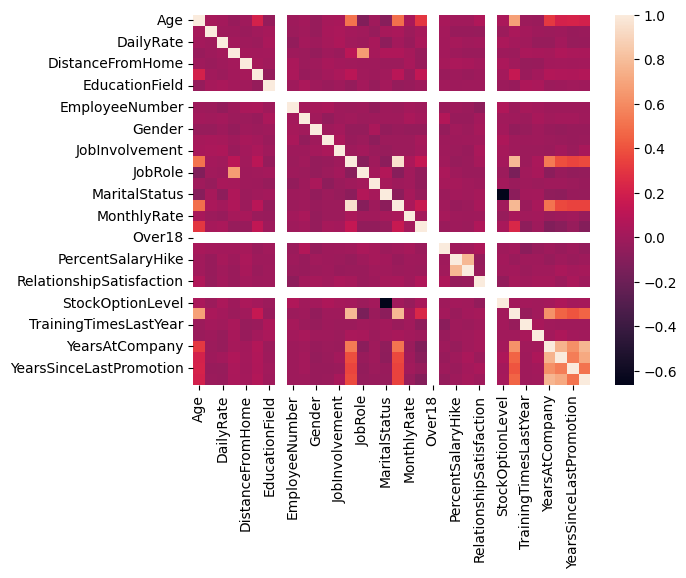

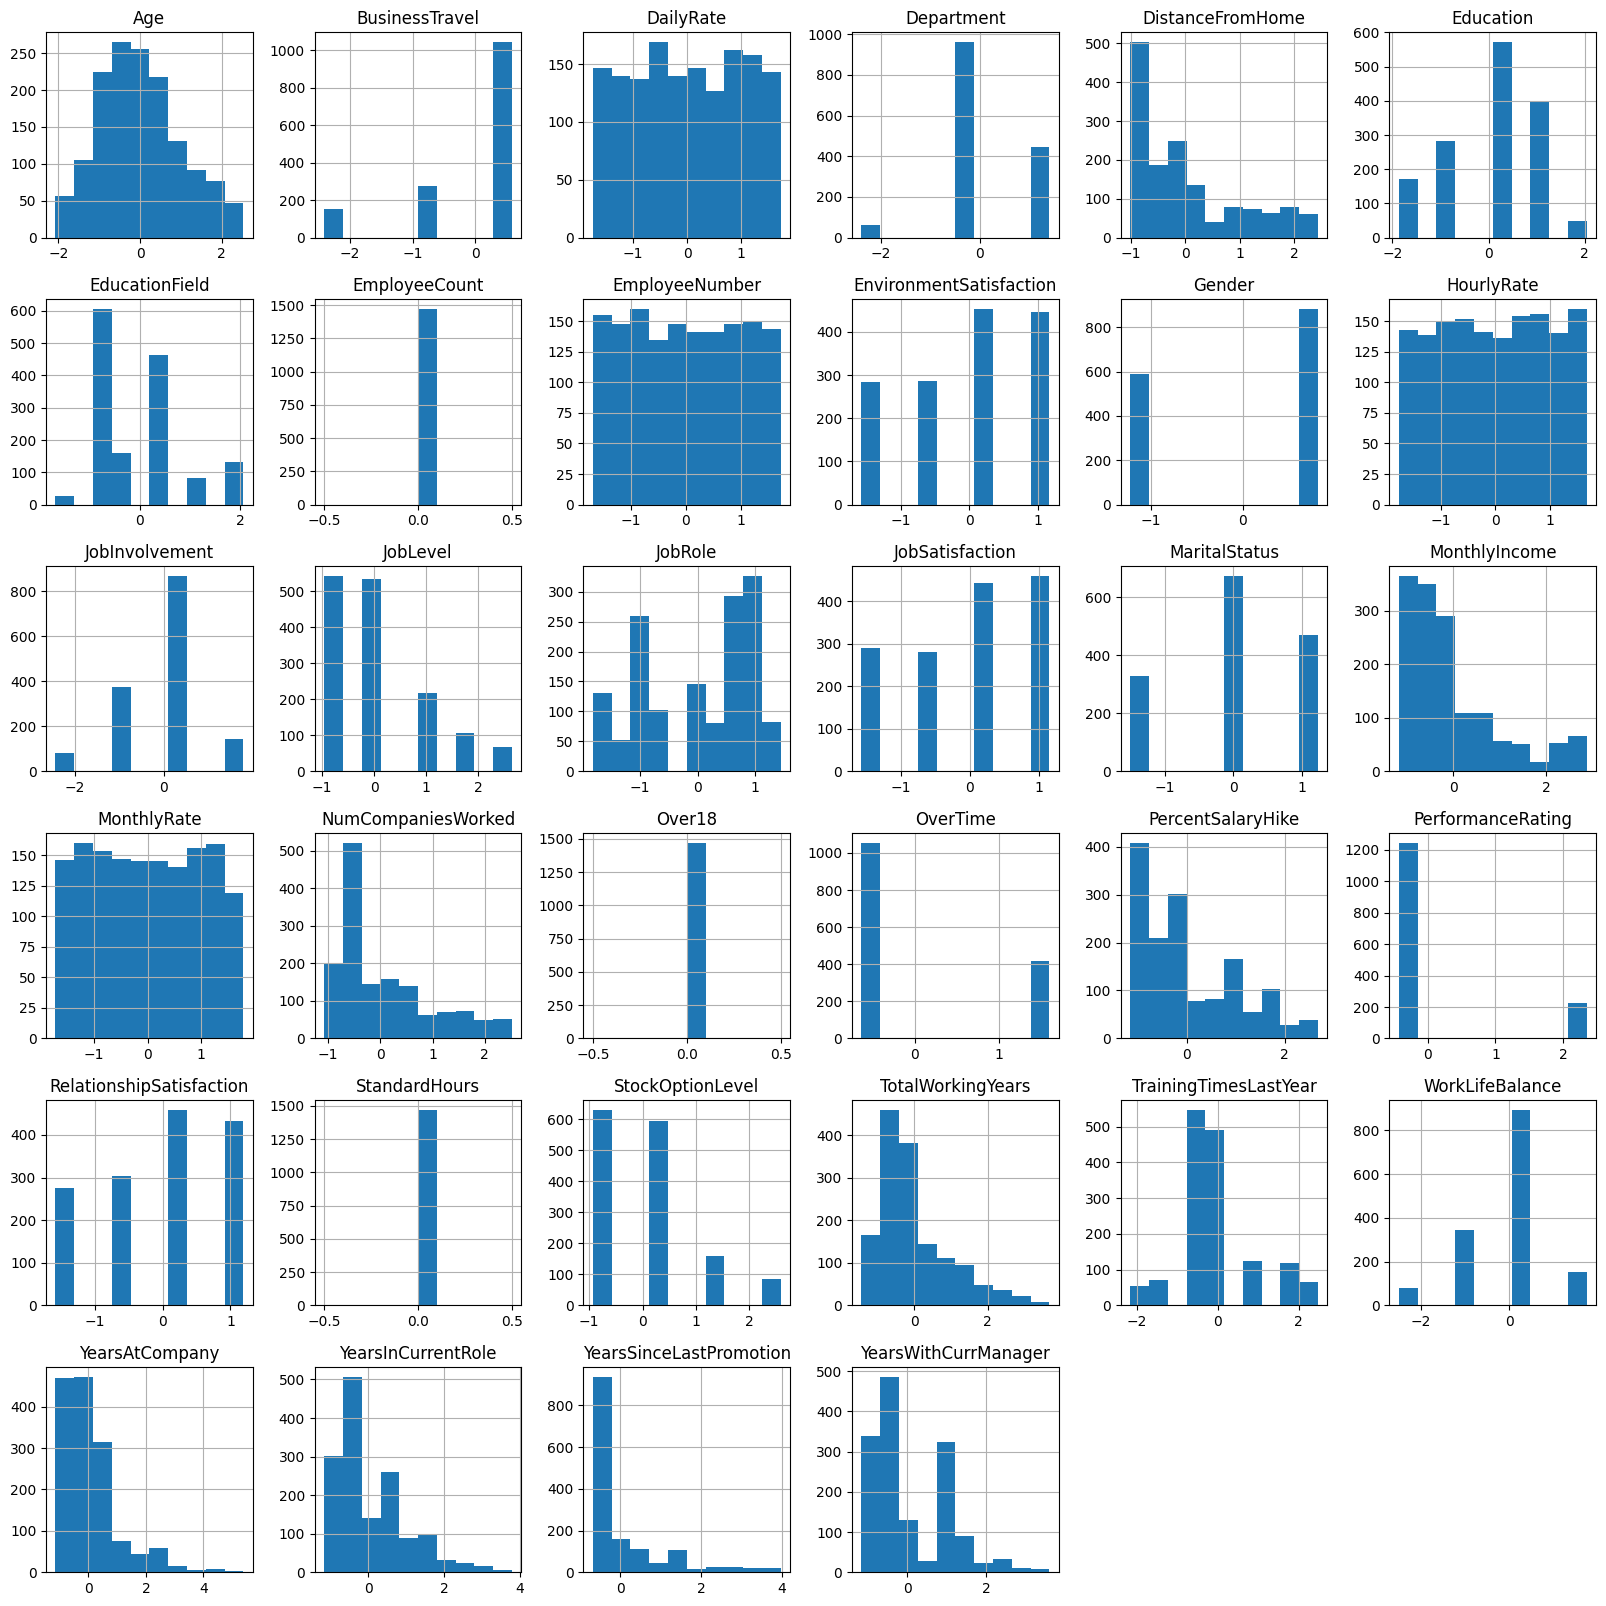

In [38]:
# Correlation
corr = X.corr()
sns.heatmap(corr)

# Histograms
X.hist(figsize=(20,20))
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8605442176870748
[[241   1]
 [ 40  12]]
              precision    recall  f1-score   support

          No       0.86      1.00      0.92       242
         Yes       0.92      0.23      0.37        52

    accuracy                           0.86       294
   macro avg       0.89      0.61      0.65       294
weighted avg       0.87      0.86      0.82       294



In [40]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)

                     Feature  Importance
17             MonthlyIncome    0.064686
0                        Age    0.058639
21                  OverTime    0.052893
18               MonthlyRate    0.052764
2                  DailyRate    0.051117
8             EmployeeNumber    0.050646
11                HourlyRate    0.048446
4           DistanceFromHome    0.048080
27         TotalWorkingYears    0.047776
30            YearsAtCompany    0.038713
22         PercentSalaryHike    0.034966
19        NumCompaniesWorked    0.031243
14                   JobRole    0.030554
26          StockOptionLevel    0.030191
33      YearsWithCurrManager    0.030067
9    EnvironmentSatisfaction    0.029622
24  RelationshipSatisfaction    0.028315
12            JobInvolvement    0.028117
28     TrainingTimesLastYear    0.028112
15           JobSatisfaction    0.026422
6             EducationField    0.024741
32   YearsSinceLastPromotion    0.021269
29           WorkLifeBalance    0.021119
31        YearsI